<a href="https://colab.research.google.com/github/maryum270/Predicting-Air-Quality-An-Applied-AI-Approach-to-Beijing-s-Pollution-Data/blob/main/Initial_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Beijing Air Quality Dataset**

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and requests
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.preprocessing import StandardScaler  # For feature scaling
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical computations
import os  # For operating system interactions
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced visualizations
import requests  # For making HTTP requests
import zipfile  # For handling ZIP files
import io  # For in-memory byte streams

# Define the URL of the zipped dataset
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/sid321axn/beijing-multisite-airquality-data-set"

# Fetch the zipped dataset from the URL
response = requests.get(dataset_url)
response.raise_for_status()  # Raise an exception for HTTP errors

# Extract the contents of the ZIP file to a temporary directory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("temp_dataset")  # Extract files into "temp_dataset" directory

# Load the individual station datasets into separate Pandas DataFrames
# Adjust file paths as per the extracted file structure
stations = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv",
]

data_frames = [
    pd.read_csv(os.path.join("temp_dataset", station)) for station in stations
]

# Combine all station datasets into a single DataFrame for analysis
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame's structure
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

**Information and statistical summary with visualizatioon for each pollutant**

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None

Missing Values:
PM2.5

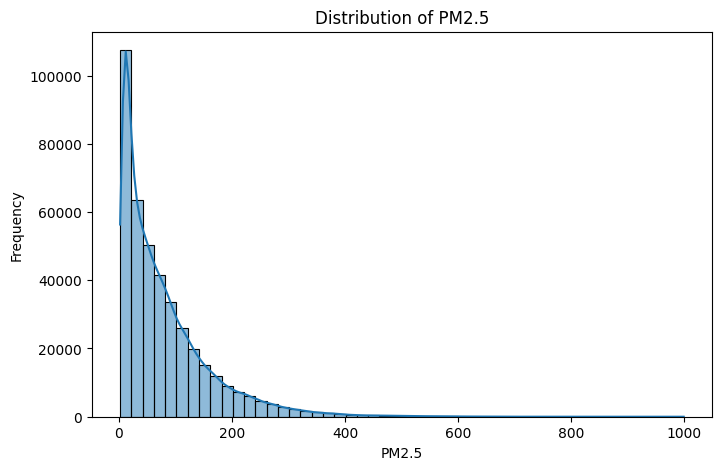

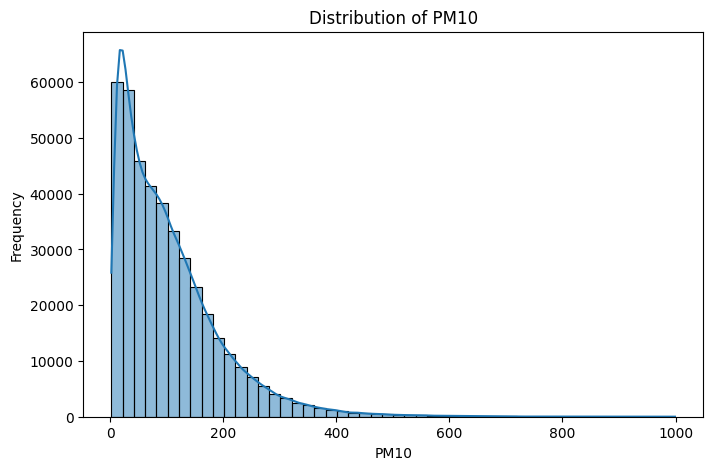

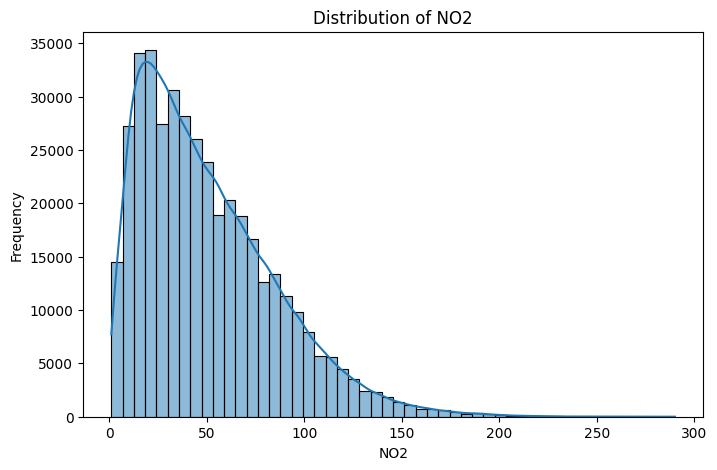

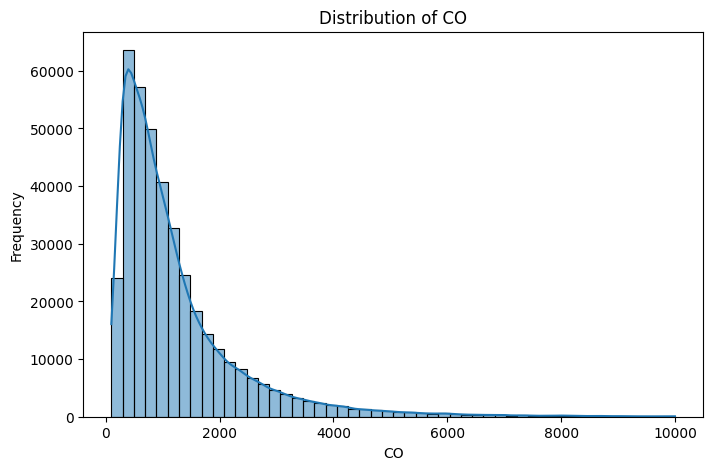

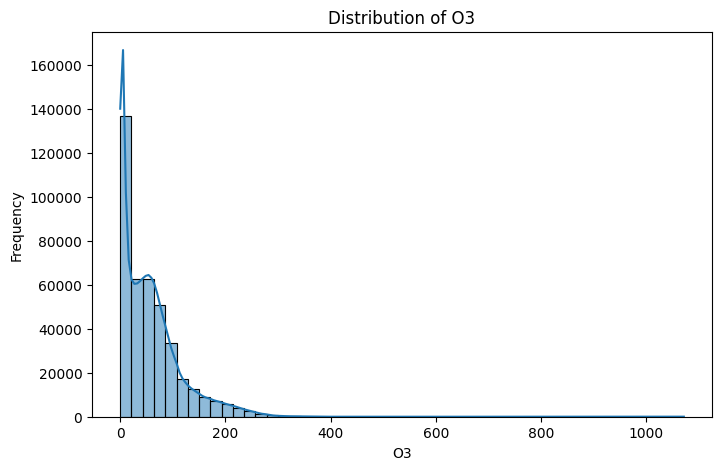


Non-Numeric Columns:
Index(['wd', 'station'], dtype='object')


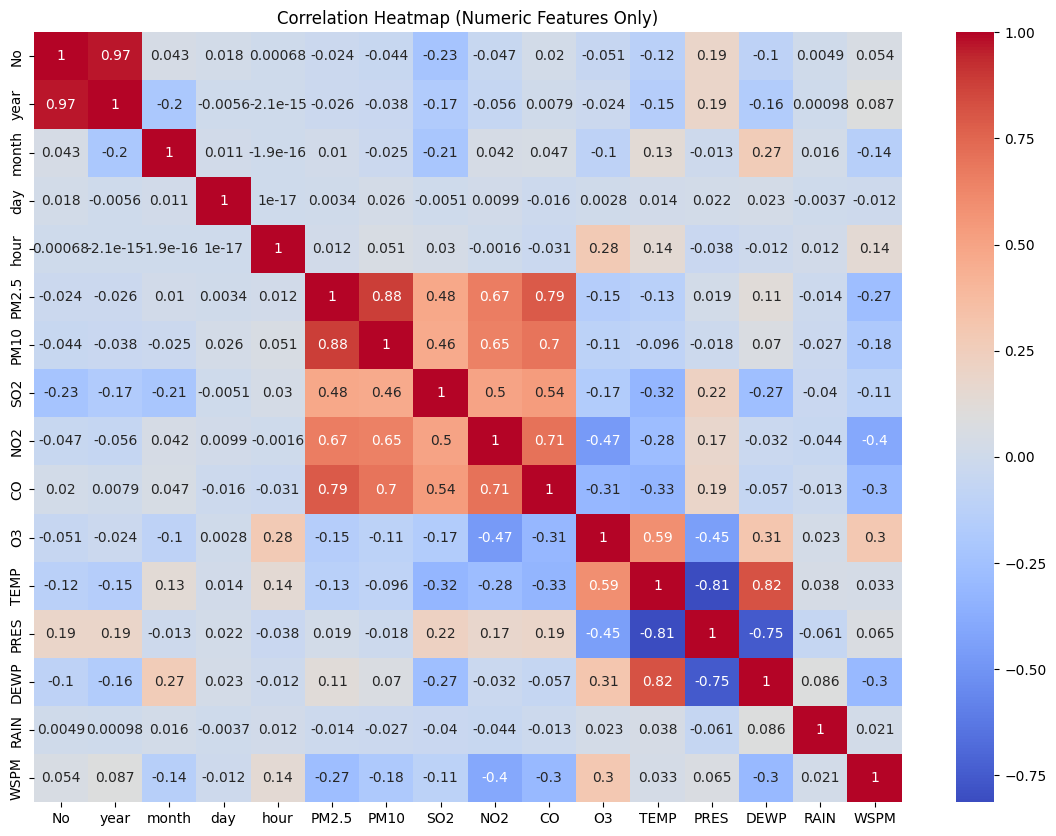

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information about the dataset
print("Dataset Overview:")
print(combined_df.info())

# Check for missing values
missing_values = combined_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Statistical summary
print("\nStatistical Summary:")
print(combined_df.describe())

# Visualizing pollutant distributions
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']  # Adjust based on dataset columns
for pollutant in pollutants:
    plt.figure(figsize=(8, 5))
    sns.histplot(combined_df[pollutant].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()

# Identify non-numeric columns
non_numeric_cols = combined_df.select_dtypes(include=['object']).columns
print("\nNon-Numeric Columns:")
print(non_numeric_cols)

# Map wind direction to angles (adjust mapping as per your dataset)
wind_mapping = {
    'N': 0, 'NE': 45, 'E': 90, 'SE': 135,
    'S': 180, 'SW': 225, 'W': 270, 'NW': 315
}

# Assuming 'wind_direction_column_name' is the actual column name for wind direction
if 'wind_direction_column_name' in combined_df.columns:
    combined_df['Wind_Direction_Angle'] = combined_df['wind_direction_column_name'].map(wind_mapping)

# Now drop only non-numeric columns except the encoded wind direction for correlation
numeric_df = combined_df.drop(columns=[col for col in non_numeric_cols if col != 'Wind_Direction_Angle'], errors='ignore')

# Re-run the correlation heatmap with numeric data only
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()



**Information about Numerical and Categorical columns**

In [ ]:
# Separate numerical and categorical columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
categorical_cols = combined_df.select_dtypes(include=['object']).columns

# Display the count and names of numerical and categorical columns
print("Numerical Columns:")
print(numeric_cols)
print("\nNumber of Numerical Columns:", len(numeric_cols))
print("\nNumerical Columns and Missing Values:")
print(combined_df[numeric_cols].isnull().sum())

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", len(categorical_cols))
print("\nCategorical Columns and Missing Values:")
print(combined_df[categorical_cols].isnull().sum())

Numerical Columns:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

Number of Numerical Columns: 16

Numerical Columns and Missing Values:
No           0
year         0
month        0
day          0
hour         0
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
WSPM       318
dtype: int64

Categorical Columns:
Index(['wd', 'station'], dtype='object')

Number of Categorical Columns: 2

Categorical Columns and Missing Values:
wd         1822
station       0
dtype: int64


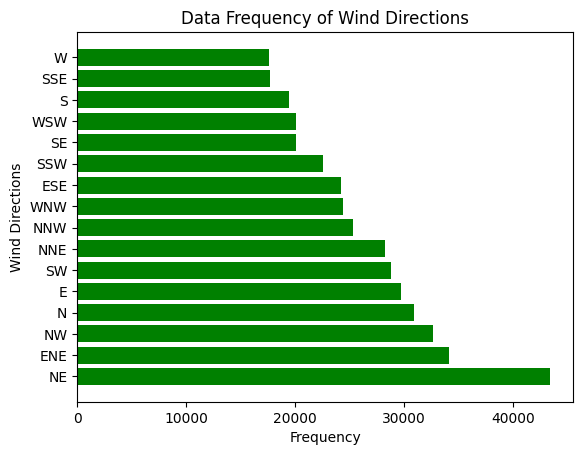


Number of Wind Directions:

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [ ]:
# Plot wind direction frequency
plt.barh(combined_df["wd"].value_counts().index, combined_df["wd"].value_counts(), color="g")
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Data Frequency of Wind Directions")
plt.show()

# Print the counts for each wind direction
print(f"\nNumber of Wind Directions:\n\n{combined_df['wd'].value_counts()}")

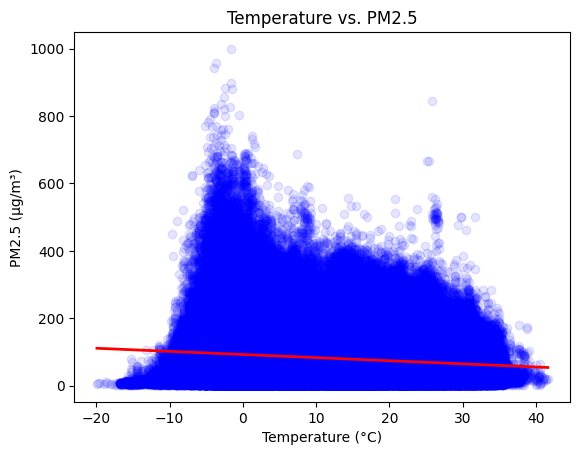

In [ ]:
# Temperature vs. PM2.5 with regression line
sns.regplot(
    x='TEMP', y='PM2.5', data=combined_df,
    scatter_kws={'alpha': 0.1, 'color': 'blue'},
    line_kws={'color': 'r', 'linewidth': 2}
)
plt.title('Temperature vs. PM2.5')
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

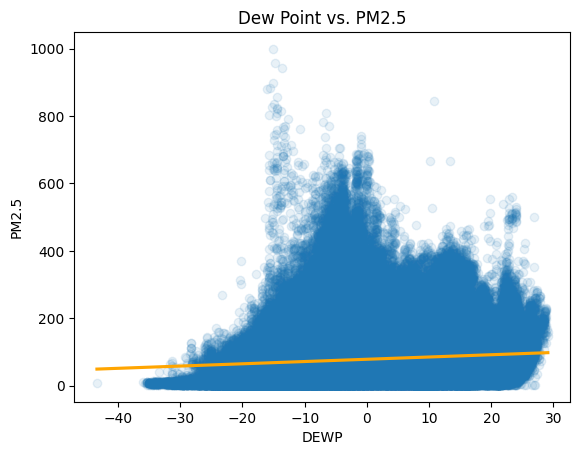

In [ ]:
# Dew Point vs. PM2.5 with regression line
sns.regplot(
    x='DEWP', y='PM2.5', data=combined_df,
    scatter_kws={'alpha': 0.1},
    line_kws={'color': "orange"}
)
plt.title('Dew Point vs. PM2.5')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


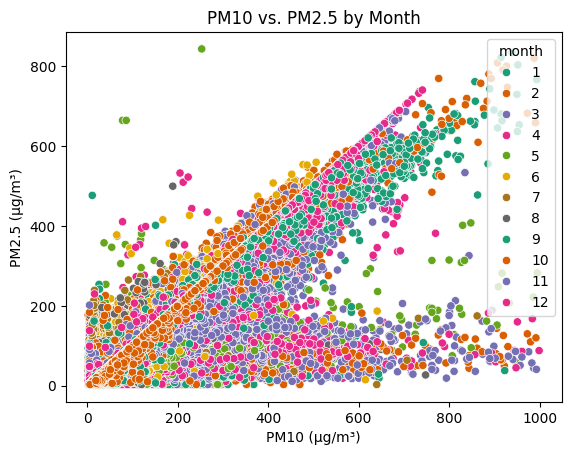

In [ ]:
# Scatterplot of PM10 vs. PM2.5 by month
combined_df.reset_index(drop=True, inplace=True)
sns.scatterplot(x='PM10', y='PM2.5', hue='month', data=combined_df, palette="Dark2")
plt.title('PM10 vs. PM2.5 by Month')
plt.xlabel("PM10 (µg/m³)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


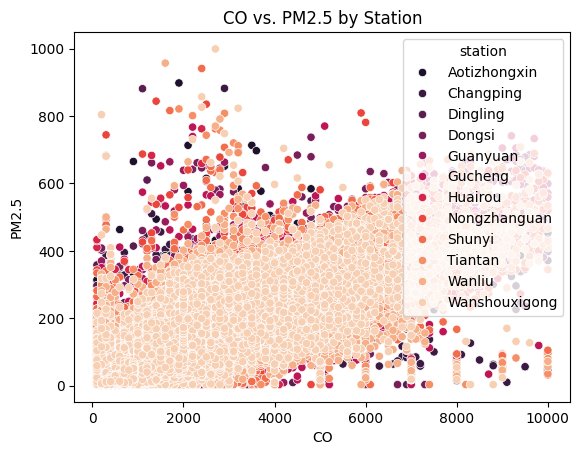

In [ ]:
# Scatterplot of CO vs. PM2.5 by station
sns.scatterplot(x='CO', y='PM2.5', hue='station', data=combined_df, palette="rocket")
plt.title('CO vs. PM2.5 by Station')
plt.show()

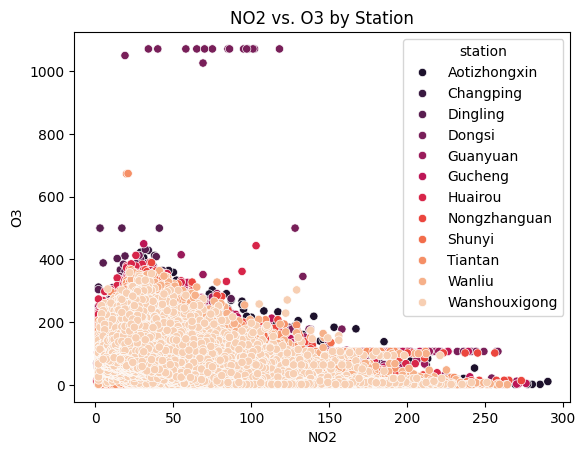

In [ ]:
# Scatterplot of NO2 vs. O3 by station
sns.scatterplot(x='NO2', y='O3', hue='station', data=combined_df, palette="rocket")
plt.title('NO2 vs. O3 by Station')
plt.show()

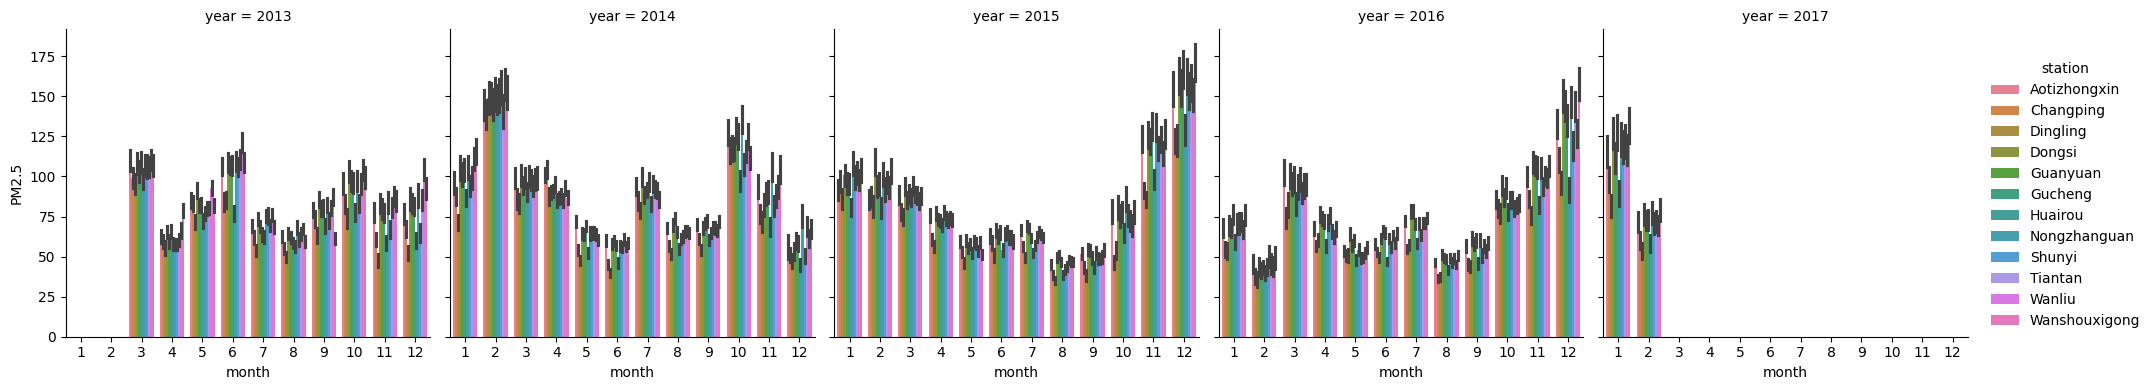

In [ ]:
# Bar plot of PM2.5 by month, station, and year
sns.catplot(x="month", y="PM2.5", hue="station", col="year", data=combined_df, kind="bar", height=4)
plt.show()

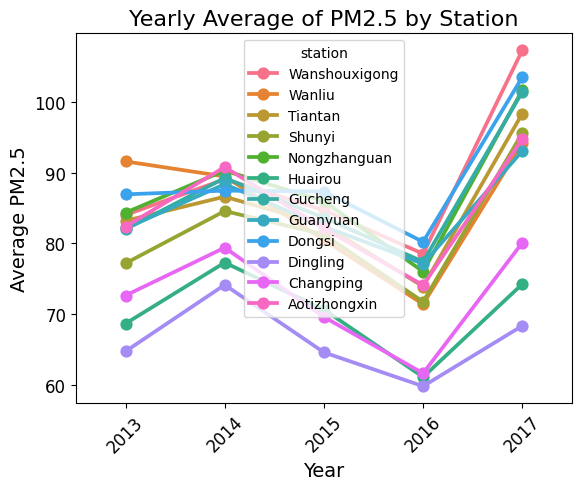

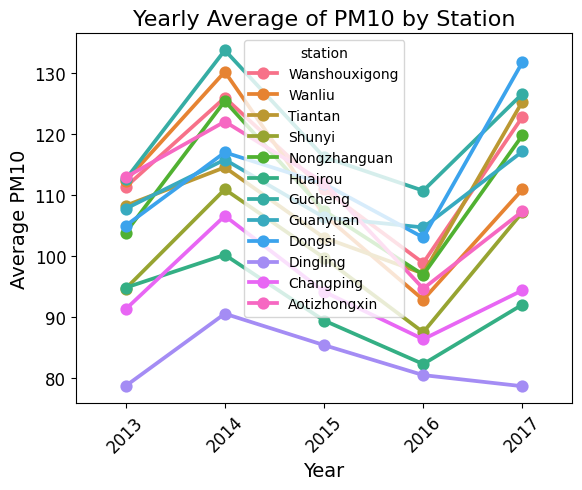

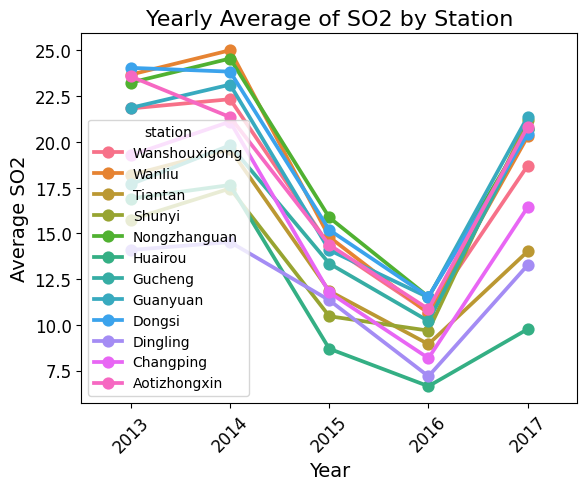

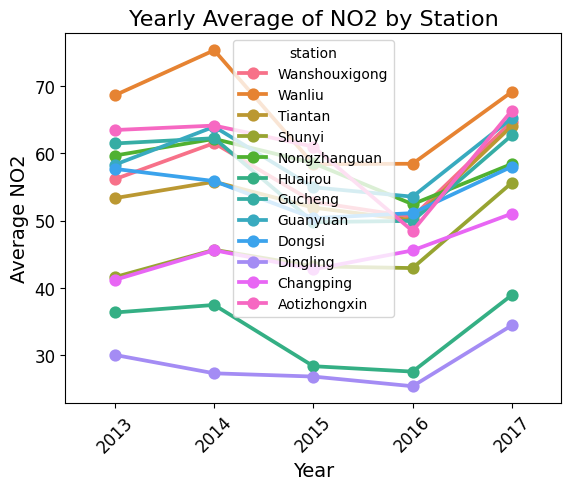

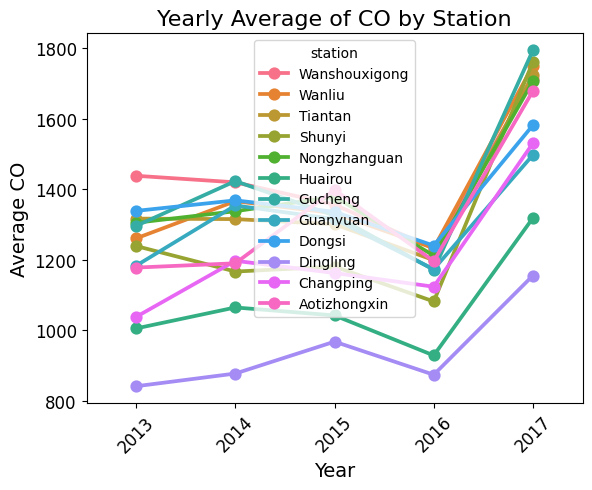

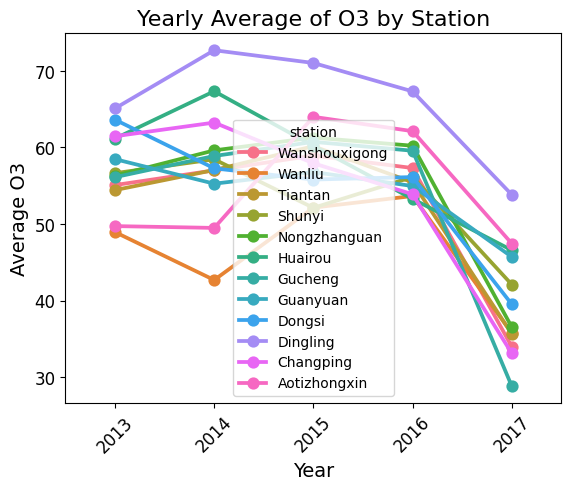

In [ ]:
# Plot yearly average of pollutants by station
compounds = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for compound in compounds:
    df = combined_df[[compound, 'year', 'station']].groupby(['year', 'station']).mean().reset_index()
    df = df.sort_values(by=['station', 'year'], ascending=False)

    sns.pointplot(x='year', y=compound, data=df, hue="station")
    plt.title(f'Yearly Average of {compound} by Station', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Average {compound}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

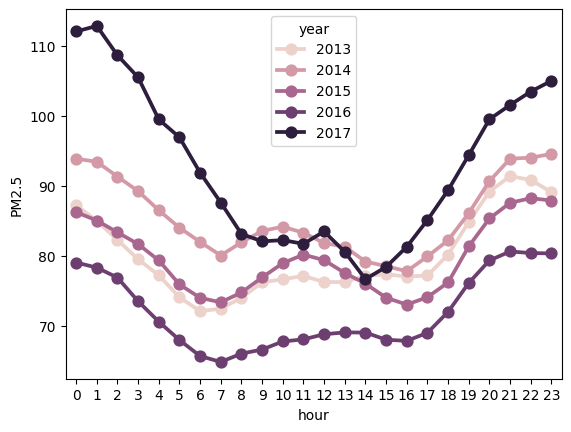

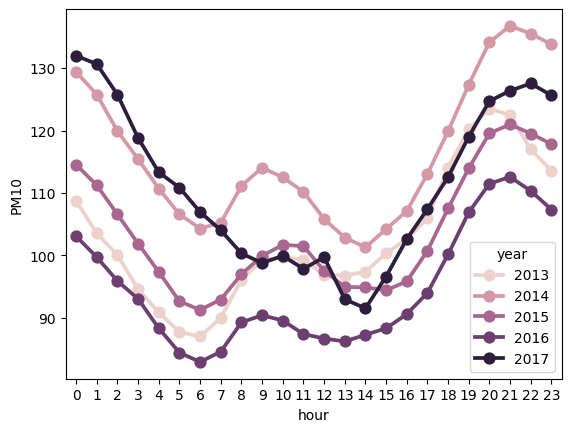

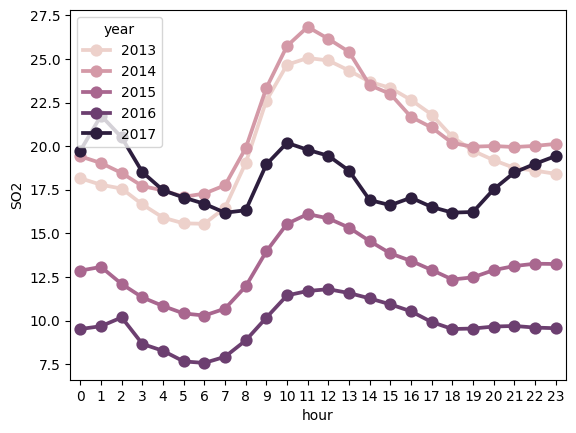

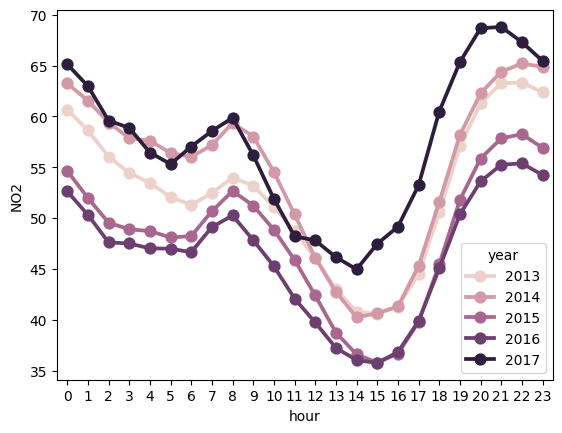

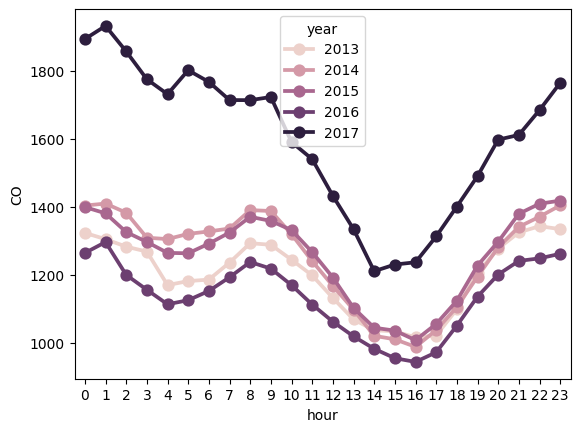

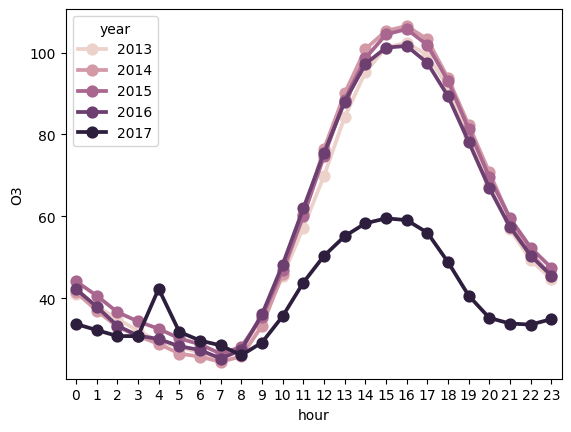

In [ ]:
# Plot hourly average of pollutants by year
for compound in compounds:
    df = combined_df[[compound, 'hour', 'year']].groupby(['year', 'hour']).mean().reset_index().sort_values(by=['year', 'hour'], ascending=False)

    sns.pointplot(x='hour', y=compound, data=df, hue="year")
    plt.show()

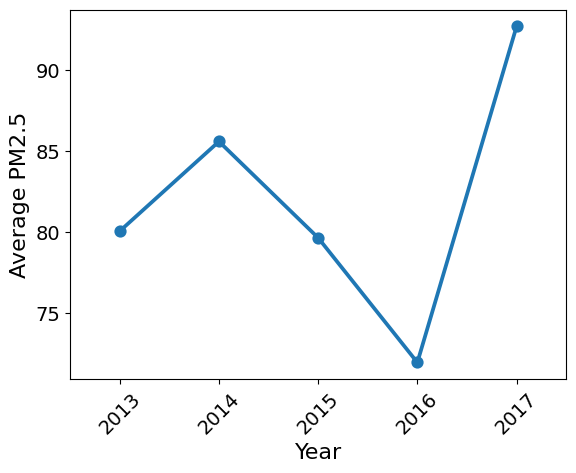

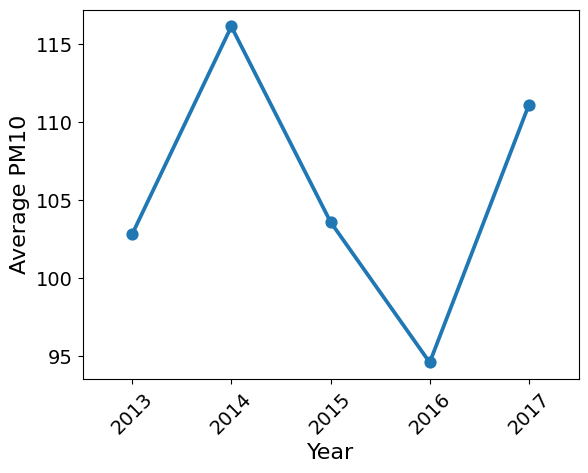

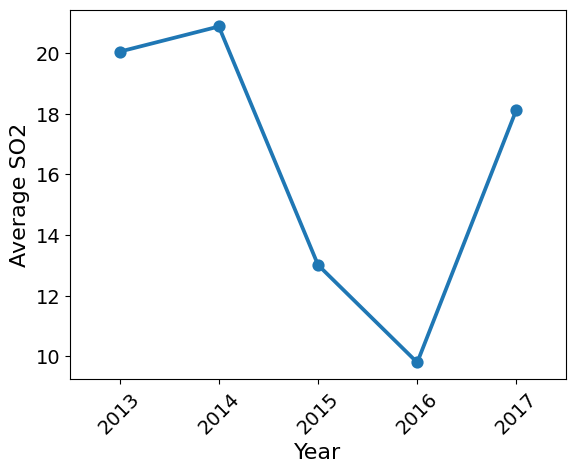

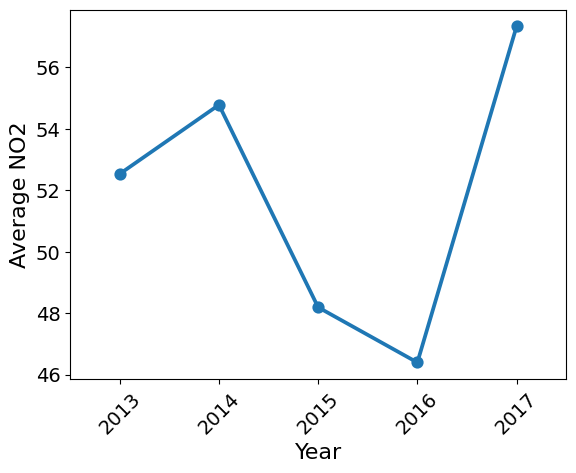

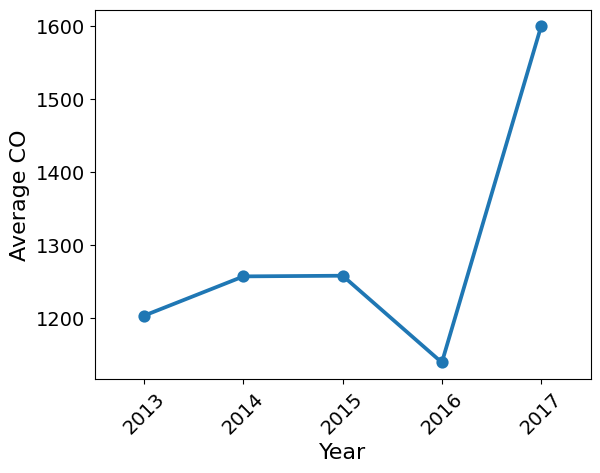

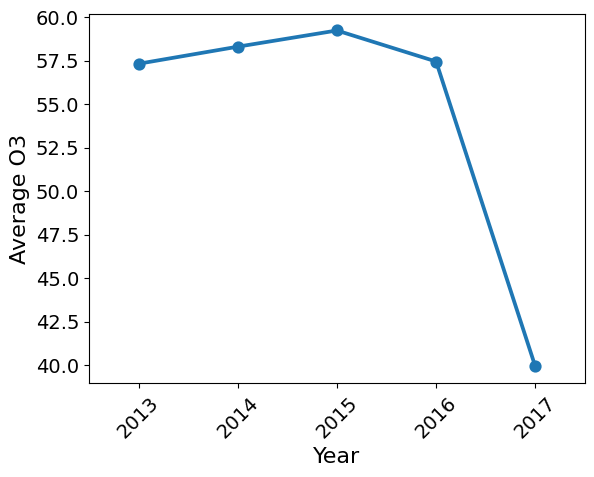

In [ ]:
# Plot yearly average of pollutants
for compound in compounds:
    df = combined_df[[compound, 'year']].groupby(['year']).mean().reset_index().sort_values(by='year', ascending=False)

    sns.pointplot(x='year', y=compound, data=df)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel(f'Average {compound}', fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()


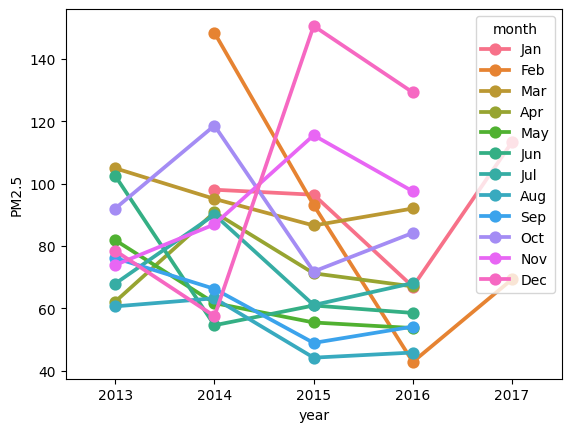

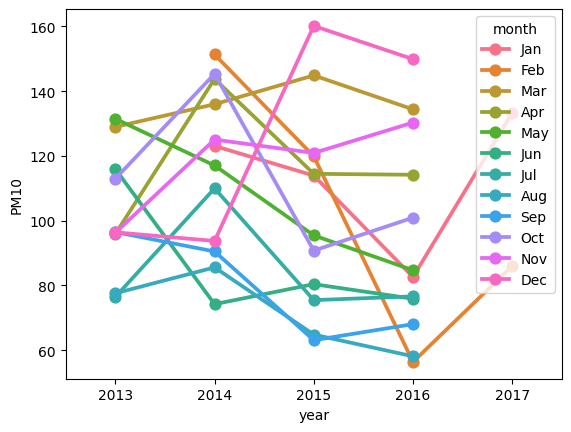

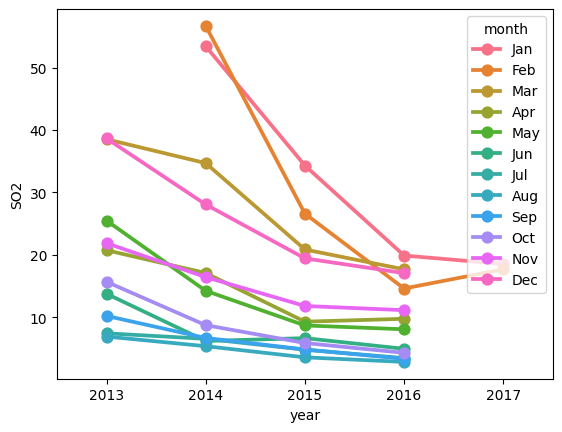

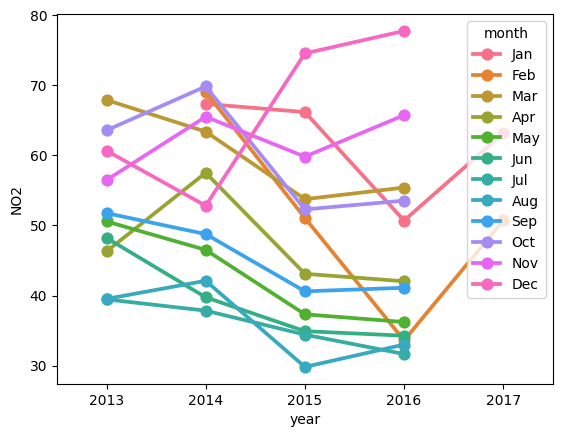

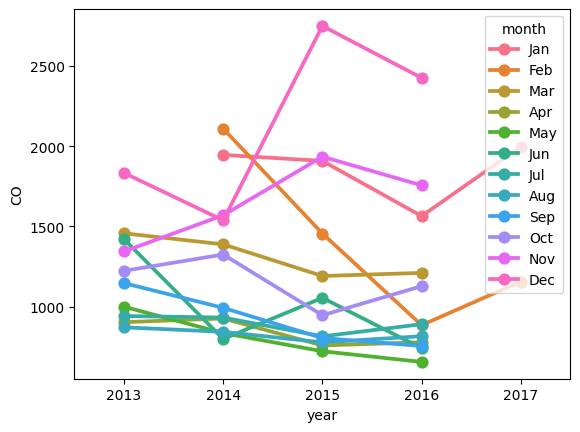

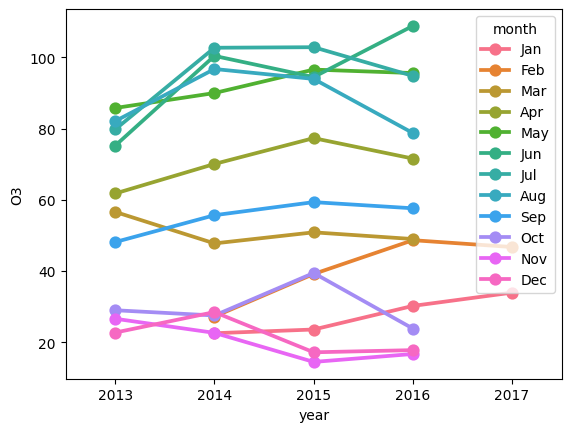

In [ ]:
# Plot monthly average of pollutants by year
for compound in compounds:
    temp_data = combined_df.copy()
    temp_data['month'] = temp_data['month'].replace(
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
    df = temp_data[[compound, 'month', 'year']].groupby(['year', 'month']).mean().reset_index().sort_values(by=['year', 'month'], ascending=False)

    sns.pointplot(x='year', y=compound, data=df, hue='month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()


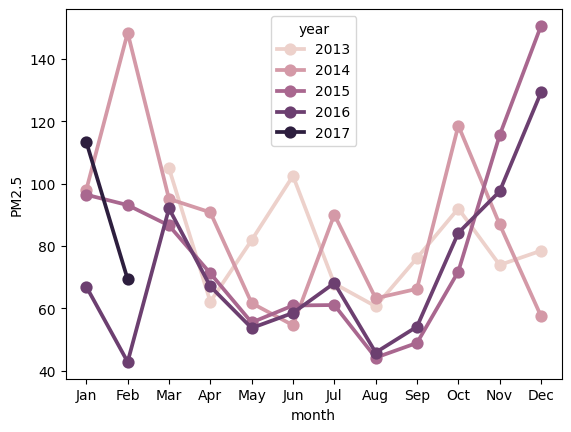

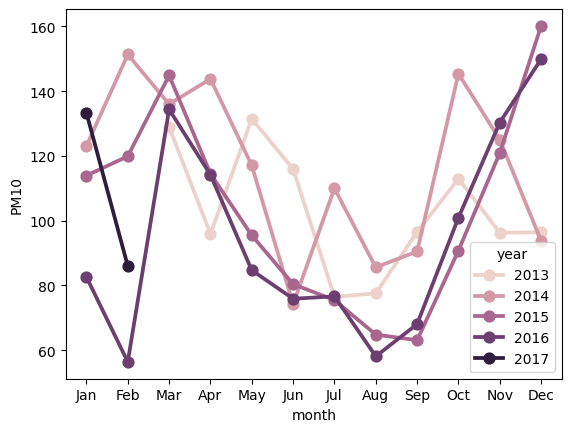

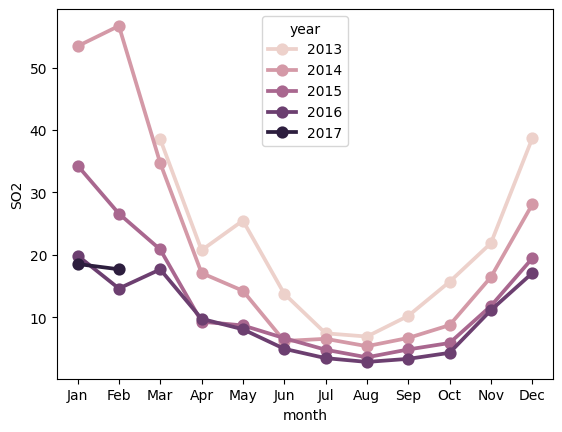

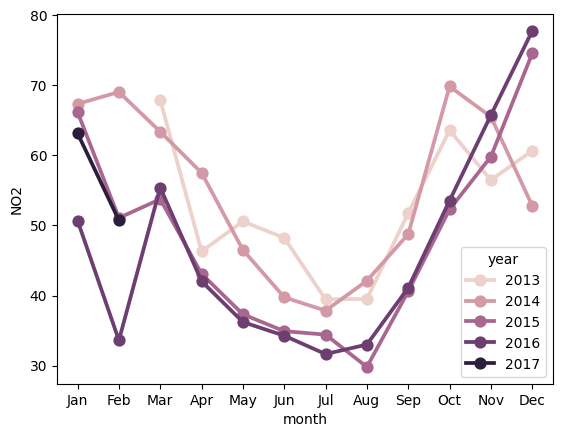

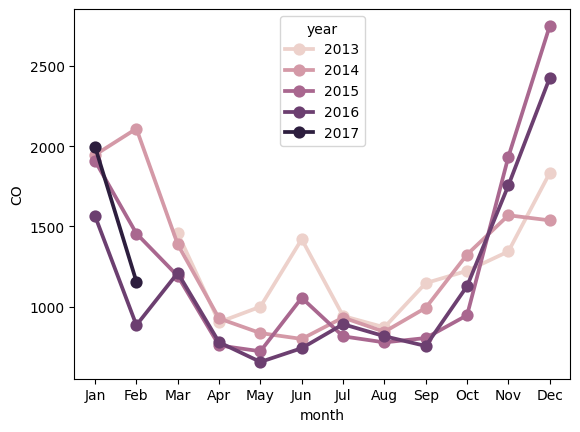

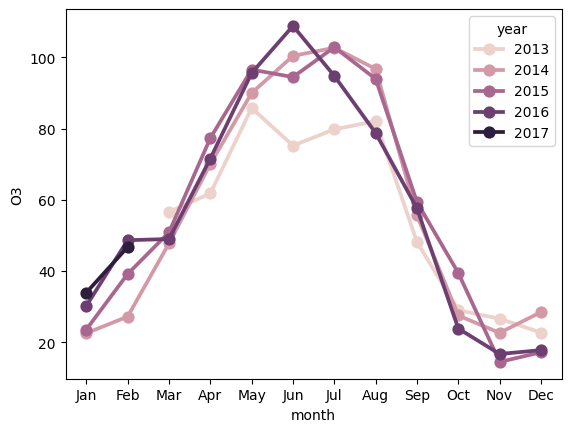

In [ ]:
# Plot monthly average of pollutants, ordered by custom month mapping
custom_dict = {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5, 'Jul': 6,
               'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}

for compound in compounds:
    temp_data = combined_df.copy()
    temp_data['month'] = temp_data['month'].replace(
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
    df = temp_data[[compound, 'month', 'year']].groupby(['year', 'month']).mean().reset_index()
    df = df.iloc[df['month'].map(custom_dict).argsort()]

    sns.pointplot(x='month', y=compound, data=df, hue="year")
    plt.show()


**Combine all 12 datasets into a single dataset by calculating the mean of each pollutant and other property for each datetime, while excluding station information. This consolidated dataset will represent the average conditions for the entire city.**

In [ ]:
# Drop 'station' and 'wd' columns and display the resulting dataframe
mean_df = combined_df.drop(columns=['station', 'wd'])
mean_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN  WSPM  
0       -0.7  1023.0 -18.8   0.0   4.4  
1       -1.1  1023.2 -18.2   0.0   4.7  
2       -1.1  1023.5 -18.2   0.0   5.6  
3       -1.4  1024.5 -19.4   0.0   3.1  
4       -2.0  1025.2 -19.5   0.0   2.0  
...      ...     ...   ...   ...   ...  
420763  12.5  1013.5 -16.2   0.0   2.4  
420764  11.6  1013.6 -15.1   0.0   0.9  
420765  10.8  1014.2 -13.3   0.0   1.1  
420766  10.5  1014.4 -12.9   0.0   1.2  
420767   8.6  1014.1 -15.9   0.0   1.3  

[420768 rows x 16 columns]

In [ ]:
# Step 2: Create a datetime column and group by it
mean_df['datetime'] = pd.to_datetime(mean_df[['year', 'month', 'day', 'hour']])
grouped = mean_df.groupby('datetime')

# Step 3: Calculate the mean for each group and handle cyclic data
Beijing_df = grouped[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()

Beijing_df

PM2.5       PM10       SO2        NO2          CO  \
datetime                                                                     
2013-03-01 00:00:00   5.666667   7.916667  5.666667  12.600000  308.333333   
2013-03-01 01:00:00   6.833333   9.833333  5.333333  13.111111  308.333333   
2013-03-01 02:00:00   5.666667   7.250000  8.166667  12.900000  300.000000   
2013-03-01 03:00:00   6.000000   9.250000  5.833333  12.400000  283.333333   
2013-03-01 04:00:00   4.833333   6.916667  6.750000  14.000000  308.333333   
...                        ...        ...       ...        ...         ...   
2017-02-28 19:00:00  16.083333  38.416667  3.583333  28.818182  408.333333   
2017-02-28 20:00:00  19.000000  38.166667  5.083333  41.666667  533.333333   
2017-02-28 21:00:00  15.666667  33.083333  5.000000  40.833333  558.333333   
2017-02-28 22:00:00  13.666667  29.666667  5.500000  40.166667  591.666667   
2017-02-28 23:00:00  15.000000  31.833333  6.500000  50.416667  658.333333   

                            O3       TEMP         PRES       DEWP  RAIN  \
datetime                                                                  
2013-03-01 00:00:00  75.416667  -0.916667  1022.766667 -19.900000   0.0   
2013-03-01 01:00:00  75.750000  -1.216667  1023.191667 -19.916667   0.0   
2013-03-01 02:00:00  66.000000  -1.591667  1023.325000 -21.008333   0.0   
2013-03-01 03:00:00  75.333333  -1.891667  1024.208333 -21.833333   0.0   
2013-03-01 04:00:00  66.333333  -2.283333  1024.866667 -21.625000   0.0   
...                        ...        ...          ...        ...   ...   
2017-02-28 19:00:00  71.900000  12.000000  1011.950000 -15.133333   0.0   
2017-02-28 20:00:00  56.545455  10.933333  1012.141667 -14.191667   0.0   
2017-02-28 21:00:00  54.000000  10.041667  1012.625000 -13.558333   0.0   
2017-02-28 22:00:00  53.250000   9.225000  1012.841667 -13.166667   0.0   
2017-02-28 23:00:00  41.000000   7.741667  1012.558333 -14.158333   0.0   

                         WSPM  
datetime                       
2013-03-01 00:00:00  4.175000  
2013-03-01 01:00:00  3.875000  
2013-03-01 02:00:00  4.400000  
2013-03-01 03:00:00  3.366667  
2013-03-01 04:00:00  2.716667  
...                       ...  
2017-02-28 19:00:00  2.141667  
2017-02-28 20:00:00  1.275000  
2017-02-28 21:00:00  1.350000  
2017-02-28 22:00:00  1.466667  
2017-02-28 23:00:00  1.391667  

[35064 rows x 11 columns]

In [ ]:
# Display descriptive statistics of the DataFrame
Beijing_df.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  34983.000000  34981.000000  34977.000000  34977.000000  34860.000000   
mean      79.713900    104.700644     15.837488     50.585613   1231.518482   
std       76.149408     84.670674     19.660999     29.302478   1054.535149   
min        3.250000      4.083333      1.202333      4.166667    125.000000   
25%       22.750000     40.750000      3.583333     27.916667    545.454545   
50%       57.583333     86.083333      8.000000     45.500000    900.000000   
75%      109.166667    141.333333     19.916667     67.500000   1527.272727   
max      692.000000    941.000000    248.666667    192.916667   8871.428571   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34957.000000  35046.000000  35046.000000  35046.000000  35046.000000   
mean      57.072742     13.534228   1010.750801      2.484245      0.064451   
std       53.570635     11.397491     10.212550     13.727402      0.603018   
min        1.000000    -16.625000    985.408333    -34.866667      0.000000   
25%       15.181818      3.141667   1002.241667     -8.925000      0.000000   
50%       43.666667     14.512500   1010.525000      2.975000      0.000000   
75%       78.833333     23.241667   1019.083333     15.150000      0.000000   
max      346.000000     40.425000   1040.158333     27.900000     25.008333   

               WSPM  
count  35052.000000  
mean       1.730019  
std        1.048181  
min        0.066667  
25%        1.000000  
50%        1.425000  
75%        2.158333  
max        8.666667

# **Handling Missing Data**

In [ ]:
# Check for missing values in the DataFrame
Beijing_df.isnull().sum()

PM2.5     81
PM10      83
SO2       87
NO2       87
CO       204
O3       107
TEMP      18
PRES      18
DEWP      18
RAIN      18
WSPM      12
dtype: int64

In [ ]:
# Separate numerical and categorical columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
categorical_cols = combined_df.select_dtypes(include=['object']).columns

# Display the count and names of numerical and categorical columns
print("Numerical Columns:")
print(numeric_cols)
print("\nNumber of Numerical Columns:", len(numeric_cols))
print("\nNumerical Columns and Missing Values:")
print(combined_df[numeric_cols].isnull().sum())

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", len(categorical_cols))
print("\nCategorical Columns and Missing Values:")
print(combined_df[categorical_cols].isnull().sum())

Numerical Columns:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

Number of Numerical Columns: 16

Numerical Columns and Missing Values:
No           0
year         0
month        0
day          0
hour         0
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
WSPM       318
dtype: int64

Categorical Columns:
Index(['wd', 'station'], dtype='object')

Number of Categorical Columns: 2

Categorical Columns and Missing Values:
wd         1822
station       0
dtype: int64


In [ ]:
# Identify the indices of missing values in the 'PM2.5' column
missing_indices = combined_df[combined_df['PM2.5'].isnull()].index

# Print the indices with missing values
print("Indices with missing values in 'PM2.5':")
print(missing_indices.tolist())


Indices with missing values in 'PM2.5':
[1509, 1837, 2368, 2785, 2808, 4187, 5103, 5652, 6039, 6304, 7024, 7882, 7939, 7940, 7941, 7942, 7991, 8340, 8415, 8416, 8499, 8651, 8662, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8689, 8690, 8691, 8692, 8693, 8695, 8710, 10118, 10121, 10122, 10123, 10124, 10125, 10126, 10127, 10128, 10129, 10130, 10131, 10132, 10133, 10134, 10135, 10136, 10137, 10138, 10139, 10140, 10141, 10142, 10143, 10144, 10145, 10146, 10147, 10148, 10149, 10150, 10151, 10152, 10153, 10154, 10155, 10156, 10157, 10158, 10159, 10160, 10161, 10162, 10163, 10164, 10165, 10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10179, 10180, 10181, 10182, 10183, 10184, 10199, 10200, 10353, 10354, 10361, 10499, 10500, 10788, 10789, 10859, 10860, 10866, 11393, 11538, 11579, 11703, 11704, 11877, 11994, 12106, 12107, 12203, 12437, 13019, 13840, 13841, 14005, 14103, 14104, 14108, 14109, 14110, 14111, 14112, 14113, 14114, 14115, 14116, 14117, 14118, 14

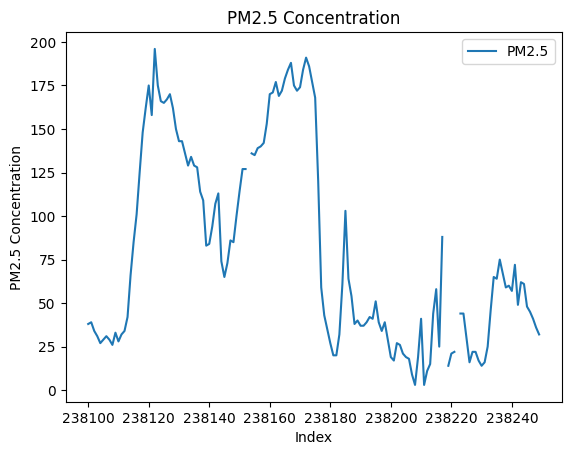

In [ ]:
# Plot the PM2.5 values between index (the index value is chosen from missing values indices)
plt.plot(combined_df['PM2.5'][238100:238250], label='PM2.5')

# Add legend to the plot
plt.legend(loc="best")

# Add title and labels for clarity
plt.title('PM2.5 Concentration')
plt.xlabel('Index')
plt.ylabel('PM2.5 Concentration')

# Show the plot
plt.show()

In [ ]:
# Apply linear interpolation for each feature
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
combined_df[features] = combined_df[features].interpolate(method='linear')

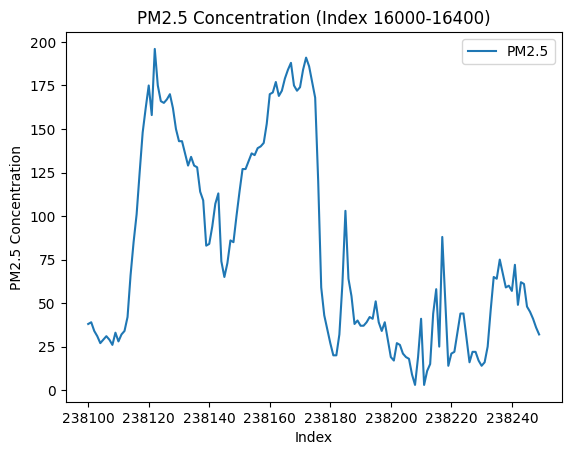

In [ ]:
# Plot the PM2.5 values between index 150 and 250
plt.plot(combined_df['PM2.5'][238100:238250], label='PM2.5')

# Add legend to the plot
plt.legend(loc="best")

# Add title and labels for clarity
plt.title('PM2.5 Concentration (Index 16000-16400)')
plt.xlabel('Index')
plt.ylabel('PM2.5 Concentration')

# Show the plot
plt.show()

**Correlation Matrix**

From the heatmap it is evident that PM2.5, PM10, NO2, and CO are the primary pollutants affecting AQHI.

Do we need outlier detection?

Skewness of PM2.5: 2.0203


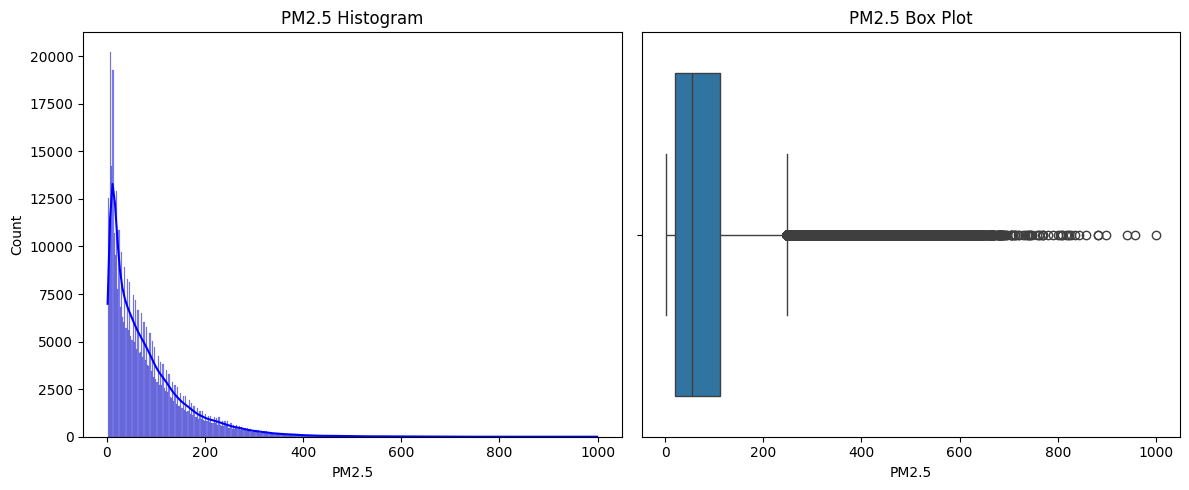

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and print skewness of the target variable (PM2.5)
print(f"Skewness of PM2.5: {combined_df['PM2.5'].skew():.4f}")

# Create subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with KDE plot
sns.histplot(combined_df['PM2.5'], ax=axes[0], color='b', kde=True)
axes[0].set_title('PM2.5 Histogram')

# Boxplot
sns.boxplot(x=combined_df['PM2.5'], ax=axes[1])
axes[1].set_title('PM2.5 Box Plot')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Skewness of CO: 2.6311
Skewness of NO2: 1.0506
Skewness of PM10: 1.9273
Skewness of O3: 1.7147
Skewness of PM2.5: 2.0203


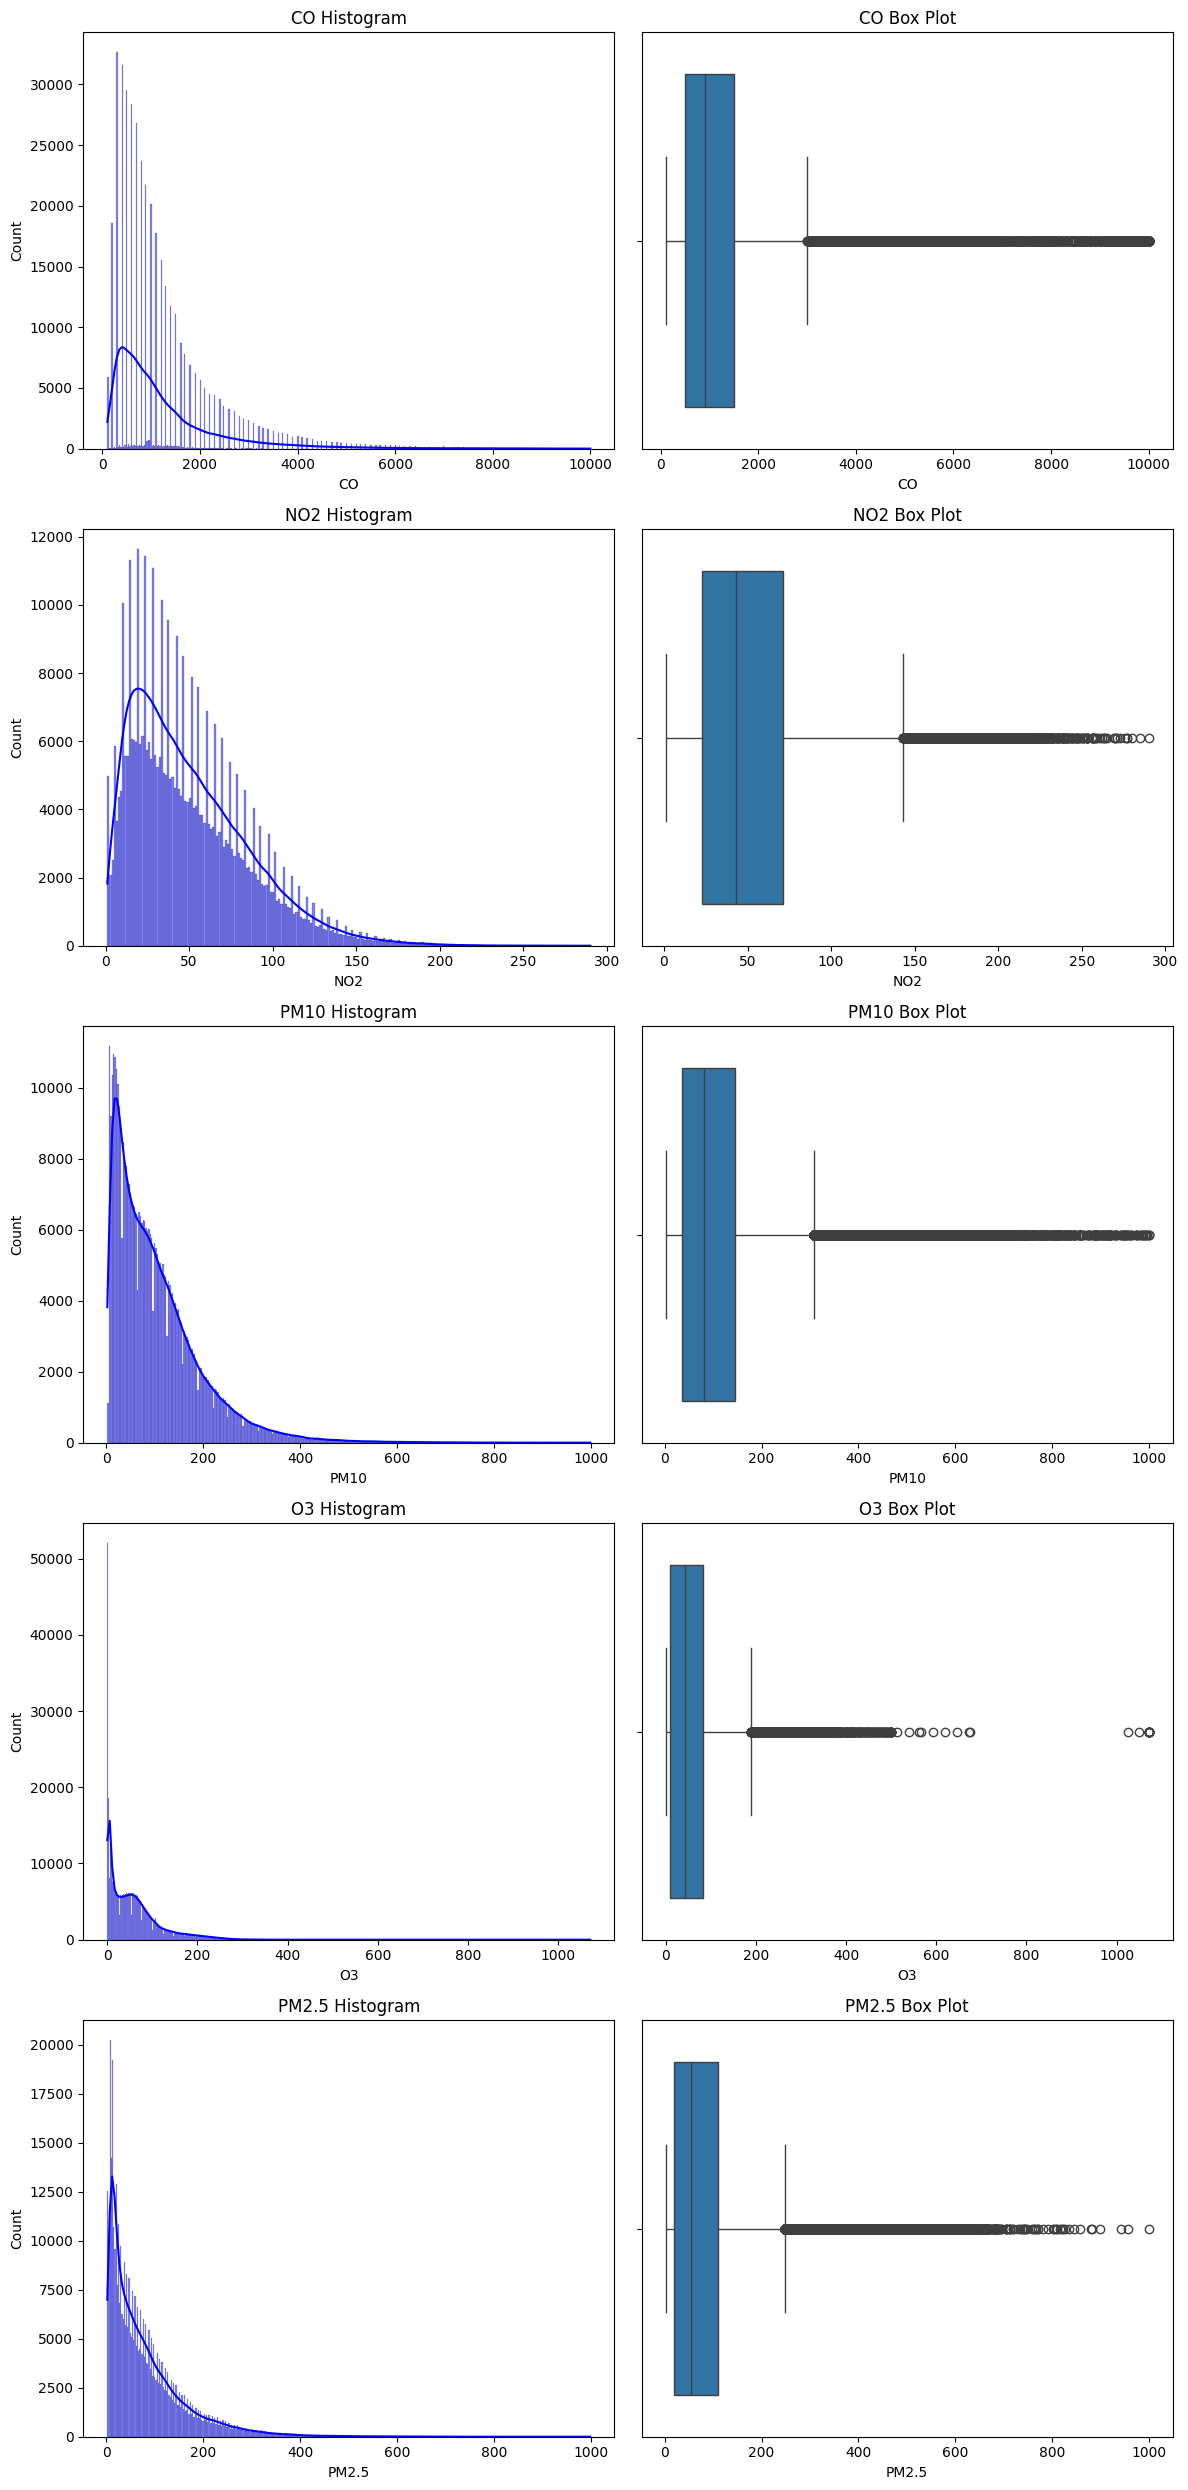

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pollutants to examine
pollutants = ['CO', 'NO2', 'PM10', 'O3', 'PM2.5']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=len(pollutants), ncols=2, figsize=(12, 5 * len(pollutants)))

# Loop to generate histograms and boxplots for each pollutant
for i, pollutant in enumerate(pollutants):
    # Print skewness of the pollutant
    print(f"Skewness of {pollutant}: {combined_df[pollutant].skew():.4f}")

    # Plot histogram with KDE
    sns.histplot(combined_df[pollutant], ax=axes[i, 0], color='b', kde=True)
    axes[i, 0].set_title(f'{pollutant} Histogram')

    # Plot boxplot
    sns.boxplot(x=combined_df[pollutant], ax=axes[i, 1])
    axes[i, 1].set_title(f'{pollutant} Box Plot')

# Adjust layout and show
plt.tight_layout()
plt.show()

Skewness of CO: 2.3731
Skewness of NO2: 0.9477
Skewness of PM10: 1.7650
Skewness of O3: 1.5202
Skewness of PM2.5: 1.8406


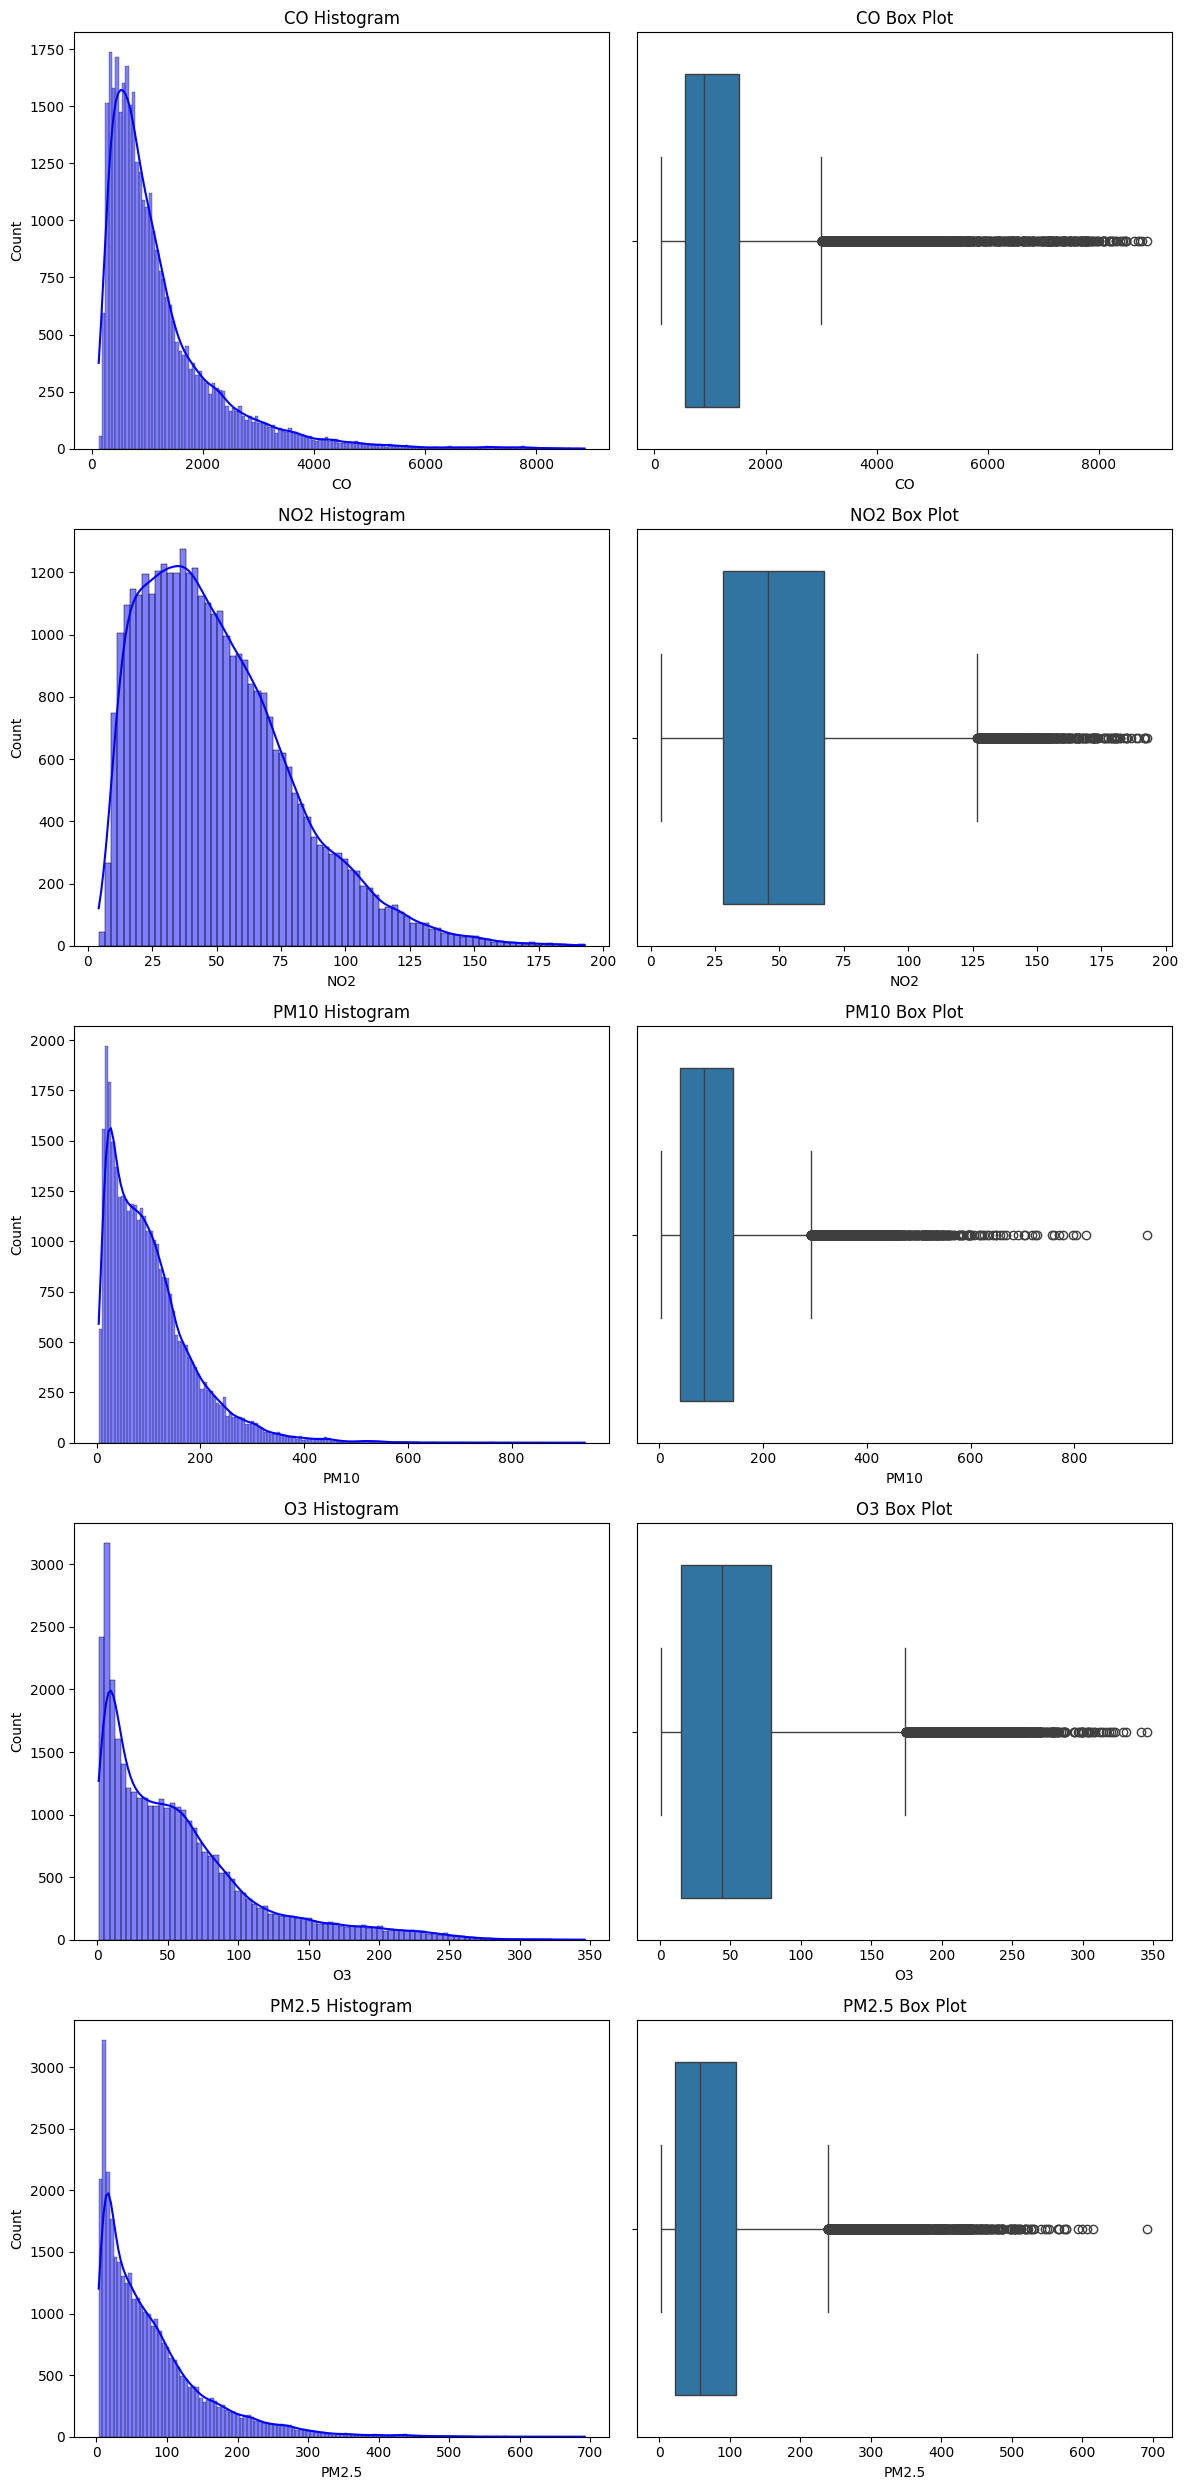

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define pollutants to examine
pollutants = ['CO', 'NO2', 'PM10', 'O3', 'PM2.5']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=len(pollutants), ncols=2, figsize=(12, 5 * len(pollutants)))

# Loop to generate histograms and boxplots for each pollutant
for i, pollutant in enumerate(pollutants):
    # Print skewness of the pollutant
    print(f"Skewness of {pollutant}: {Beijing_df[pollutant].skew():.4f}")

    # Plot histogram with KDE
    sns.histplot(Beijing_df[pollutant], ax=axes[i, 0], color='b', kde=True)
    axes[i, 0].set_title(f'{pollutant} Histogram')

    # Plot boxplot
    sns.boxplot(x=Beijing_df[pollutant], ax=axes[i, 1])
    axes[i, 1].set_title(f'{pollutant} Box Plot')

# Adjust layout and show
plt.tight_layout()
plt.show()

The target variable, AQHI, exhibits a significant positive skew (skewness = 1.38). This indicates that the data is skewed to the right, with a long tail towards higher values. To ensure accurate analysis and modeling, it is crucial to address the impact of these outliers. Normalizing the data can help mitigate the influence of extreme values.


# **Detecting Outliers**

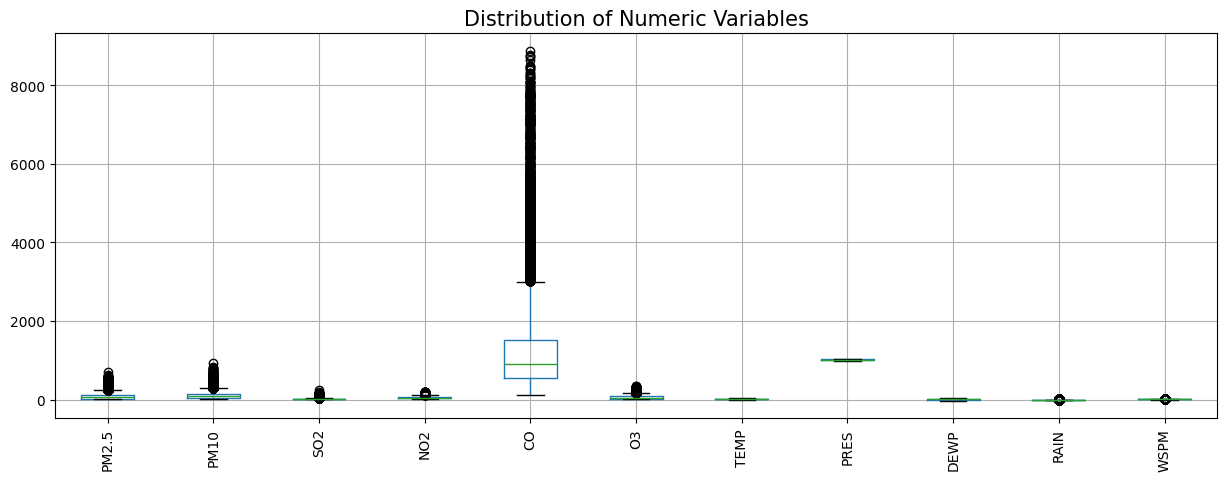

In [ ]:
# Create a copy of the dataframe and exclude non-numeric columns
Beijing_df_outlier = Beijing_df.select_dtypes(exclude='object')

# Set up the plot size and create a boxplot for numeric variables
plt.figure(figsize=(15, 5))
Beijing_df_outlier.boxplot()

# Title and x-axis label adjustments
plt.title('Distribution of Numeric Variables', fontsize=15)
plt.xticks(rotation='vertical', fontsize=10)

# Display the plot
plt.show()

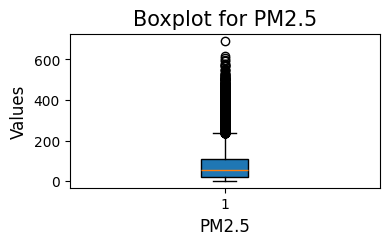

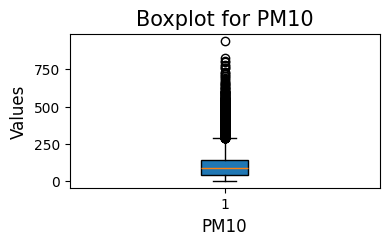

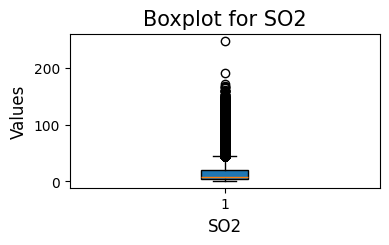

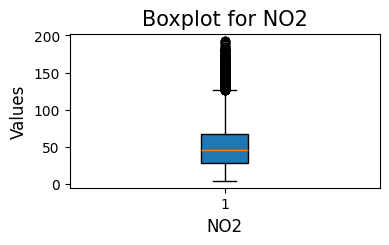

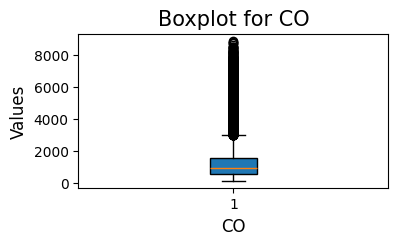

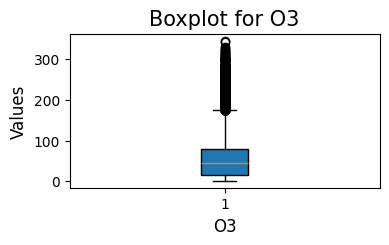

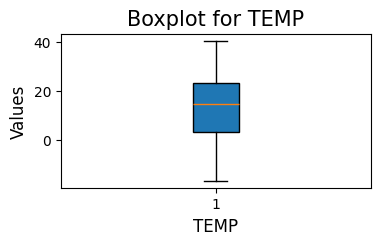

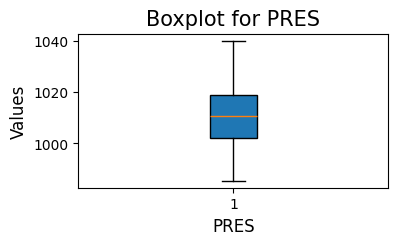

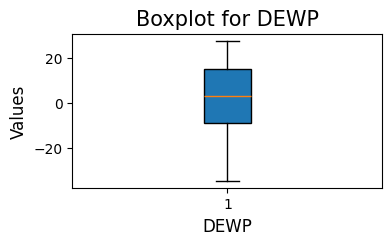

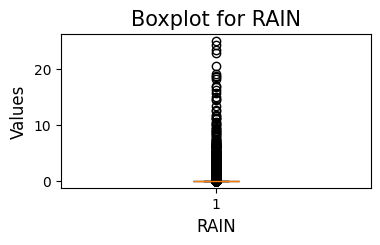

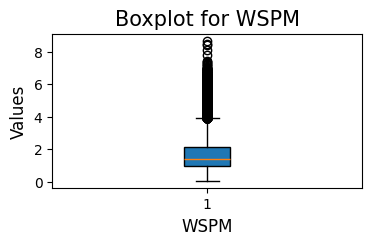

In [ ]:
import matplotlib.pyplot as plt

# Create a copy of the dataframe and exclude non-numeric columns
Beijing_df_outlier = Beijing_df.select_dtypes(exclude='object')

# Loop through each numeric column to create individual boxplots
for column in Beijing_df_outlier.columns:
    plt.figure(figsize=(4, 2))  # Set the figure size for each plot
    plt.boxplot(Beijing_df_outlier[column].dropna(), vert=True, patch_artist=True)

    # Title, x-axis, and y-axis label adjustments
    plt.title(f'Boxplot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)

    # Display the plot
    plt.show()


# **Outlier Treatment**
A common method to handle outliers in skewed data is the Interquartile Range (IQR) approach. This technique identifies outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. However, for the "Rain" feature, this method might not be suitable, as many days in Beijing are rain-free, and applying the IQR criterion could incorrectly classify these as outliers.

In [ ]:
# Display initial shape
print(f'Before: Outliers Treatment with IQR {Beijing_df.shape}')
# Creating a copy of the DataFrame to work with
Beijing_df_IQR = Beijing_df.copy()

# Selecting only numeric data types for outlier detection
numeric_columns = Beijing_df_IQR.select_dtypes(include=['float64', 'int64']).columns

# Replace outliers in each column
for col in numeric_columns:
    if col != 'RAIN':  # Skip 'RAIN' column for outlier replacement
        # Calculate Q1, Q3 and IQR
        Q1 = Beijing_df_IQR[col].quantile(0.25)
        Q3 = Beijing_df_IQR[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Define a mask for outliers
        outlier_mask = (Beijing_df_IQR[col] < lower_bound) | (Beijing_df_IQR[col] > upper_bound)

        # Replace outliers with NaN to ease the calculation of neighbors' mean
        Beijing_df_IQR.loc[outlier_mask, col] = np.nan

        # Interpolate missing values using mean of neighboring values
        Beijing_df_IQR[col] = Beijing_df_IQR[col].interpolate(method='linear', limit_direction='both')

# Display shape after outlier treatment
print(f'After: Outliers Replaced with Neighbors Mean {Beijing_df_IQR.shape}')

Before: Outliers Treatment with IQR (35064, 11)
After: Outliers Replaced with Neighbors Mean (35064, 11)


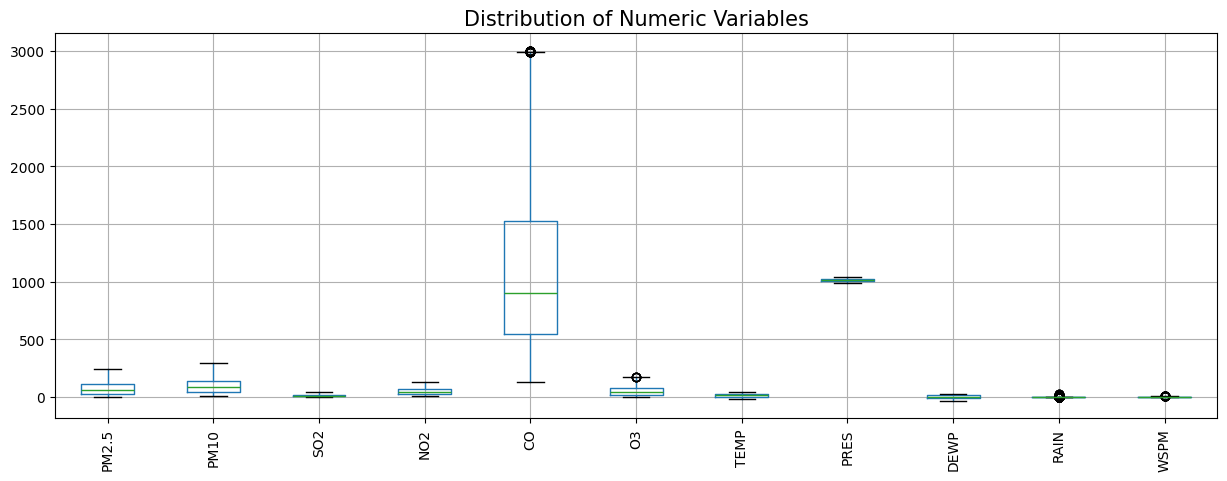

In [ ]:
# Plot a boxplot to visualize outliers in numeric variables
plt.figure(figsize=(15, 5))
Beijing_df_IQR.boxplot()

# Set plot title and x-axis label rotation
plt.title('Distribution of Numeric Variables', fontsize=15)
plt.xticks(rotation='vertical', fontsize=10)

# Display the plot
plt.show()

**To handle outliers, we will replace them with interpolated values.**

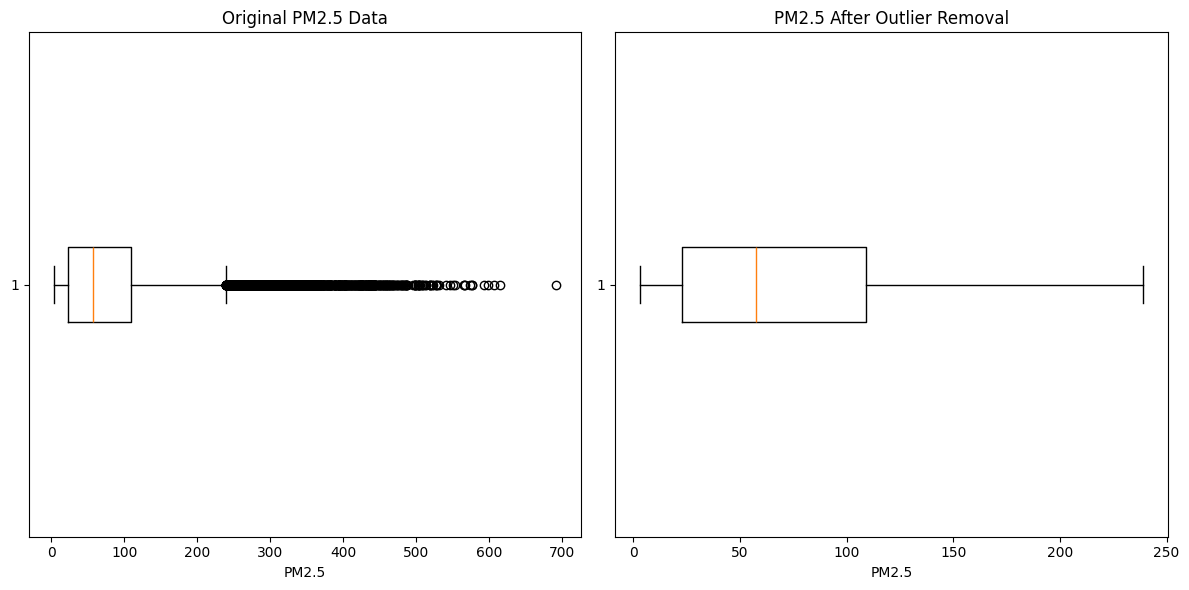

In [ ]:
# Compare PM2.5 data before and after outlier removal
original_pm25 = Beijing_df['PM2.5']
cleaned_pm25 = Beijing_df_IQR['PM2.5']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for original and cleaned PM2.5 data
for ax, data, title in zip(axs, [original_pm25, cleaned_pm25], ['Original PM2.5 Data', 'PM2.5 After Outlier Removal']):
    ax.boxplot(data.dropna(), vert=False)
    ax.set_title(title)
    ax.set_xlabel('PM2.5')

plt.tight_layout()
plt.show()

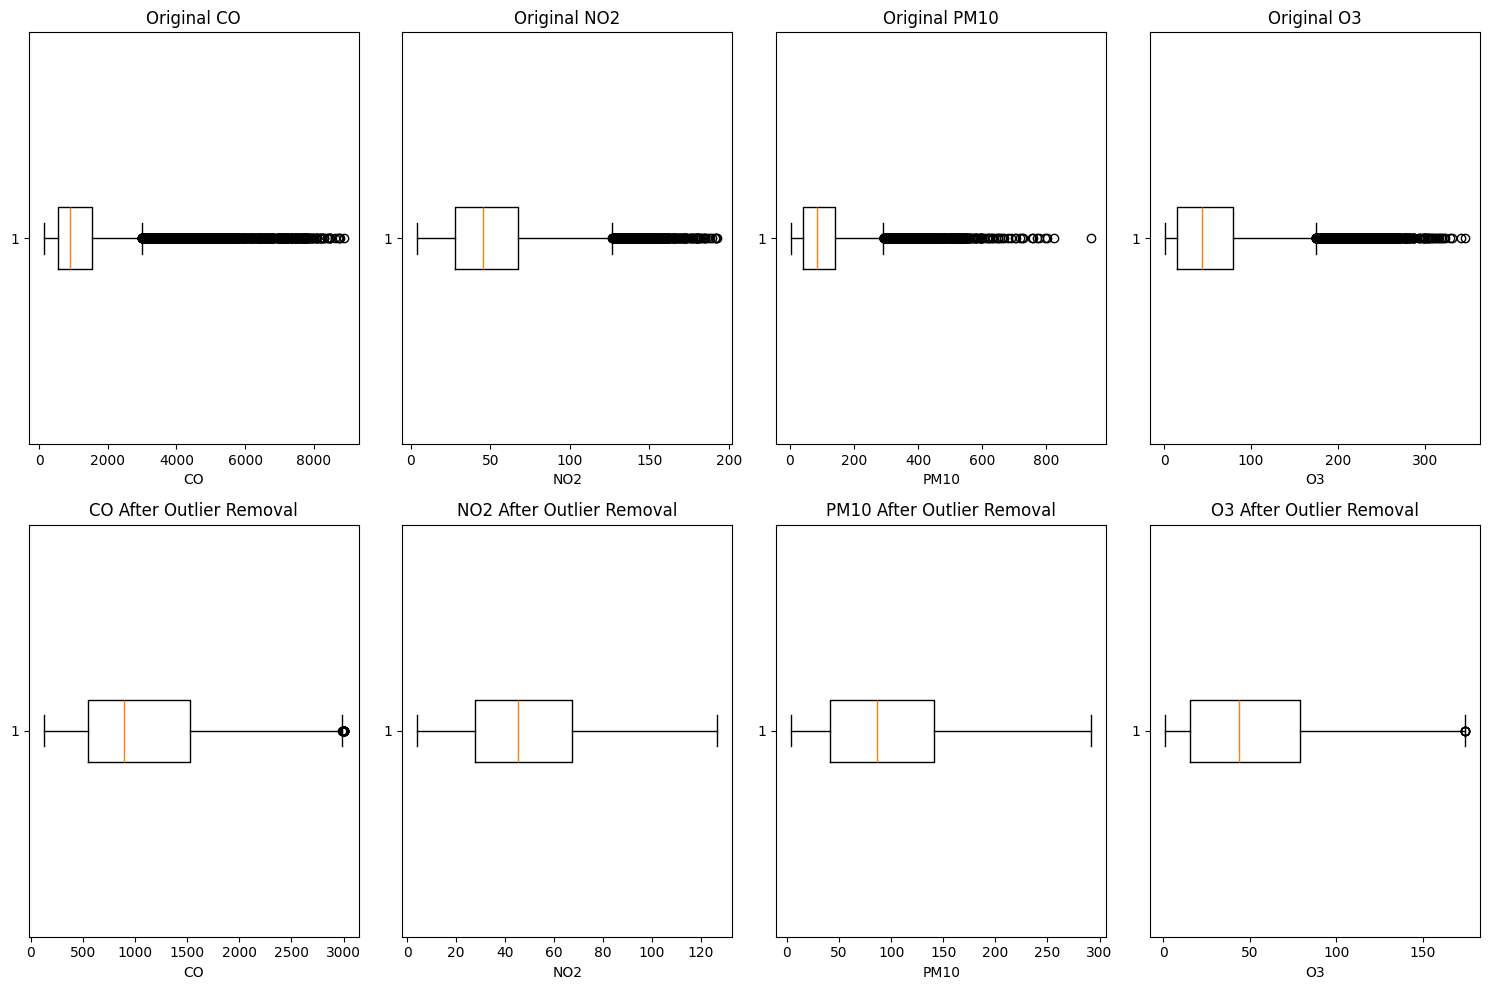

In [ ]:
import matplotlib.pyplot as plt

# Define the pollutants to compare
pollutants = ['CO', 'NO2', 'PM10', 'O3']

# Create the figure with increased size
plt.figure(figsize=(15, 10))

# Loop over each pollutant to create the subplots
for i, pollutant in enumerate(pollutants, 1):
    # Plot for the original data
    plt.subplot(2, len(pollutants), i)
    plt.boxplot(Beijing_df[pollutant].dropna(), vert=False)
    plt.title(f'Original {pollutant}')
    plt.xlabel(pollutant)

    # Plot for the cleaned data
    plt.subplot(2, len(pollutants), i + len(pollutants))
    plt.boxplot(Beijing_df_IQR[pollutant].dropna(), vert=False)
    plt.title(f'{pollutant} After Outlier Removal')
    plt.xlabel(pollutant)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Data Consistency Check

Explanation:

Year, Month, Day, Hour: These columns are checked to ensure they fall within valid ranges.

Pollutants (PM2.5, PM10, etc.): Negative values are invalid for pollutants.

Temperature (TEMP): Ensures temperature values are within a reasonable range (you can adjust this).

WSPM & RAIN: These values should be non-negative.

In [ ]:
# 1. Ensure 'year' is within a reasonable range (e.g., 2000–2024)
invalid_year = combined_df[(combined_df['year'] < 2000) | (combined_df['year'] > 2024)]

# 2. Ensure 'month' is between 1 and 12
invalid_month = combined_df[(combined_df['month'] < 1) | (combined_df['month'] > 12)]

# 3. Ensure 'day' is between 1 and 31
invalid_day = combined_df[(combined_df['day'] < 1) | (combined_df['day'] > 31)]

# 4. Ensure 'hour' is between 0 and 23
invalid_hour = combined_df[(combined_df['hour'] < 0) | (combined_df['hour'] > 23)]

# 5. Ensure pollutants like PM2.5, PM10, SO2, etc., are non-negative
invalid_pollutants = combined_df[
    (combined_df['PM2.5'] < 0) |
    (combined_df['PM10'] < 0) |
    (combined_df['SO2'] < 0) |
    (combined_df['NO2'] < 0) |
    (combined_df['CO'] < 0) |
    (combined_df['O3'] < 0)
]

# 6. Ensure 'TEMP' (temperature) is reasonable (e.g., between -50 and 50 degrees)
invalid_temp = combined_df[(combined_df['TEMP'] < -50) | (combined_df['TEMP'] > 50)]

# 7. Check for non-negative wind speed 'WSPM' and precipitation 'RAIN'
invalid_wspm = combined_df[combined_df['WSPM'] < 0]
invalid_rain = combined_df[combined_df['RAIN'] < 0]

# Display results
print("\nInvalid Years:\n", invalid_year)
print("\nInvalid Months:\n", invalid_month)
print("\nInvalid Days:\n", invalid_day)
print("\nInvalid Hours:\n", invalid_hour)
print("\nInvalid Pollutants (Negative Values):\n", invalid_pollutants)
print("\nInvalid Temperature Values:\n", invalid_temp)
print("\nInvalid Wind Speed (Negative Values):\n", invalid_wspm)
print("\nInvalid Rainfall (Negative Values):\n", invalid_rain)



Invalid Years:
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Months:
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Days:
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Hours:
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Pollutants (Negative Values):
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Temperature Values:
 Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Wind Speed (Negative Valu

In [ ]:
Beijing_df_IQR

PM2.5       PM10       SO2        NO2          CO  \
datetime                                                                     
2013-03-01 00:00:00   5.666667   7.916667  5.666667  12.600000  308.333333   
2013-03-01 01:00:00   6.833333   9.833333  5.333333  13.111111  308.333333   
2013-03-01 02:00:00   5.666667   7.250000  8.166667  12.900000  300.000000   
2013-03-01 03:00:00   6.000000   9.250000  5.833333  12.400000  283.333333   
2013-03-01 04:00:00   4.833333   6.916667  6.750000  14.000000  308.333333   
...                        ...        ...       ...        ...         ...   
2017-02-28 19:00:00  16.083333  38.416667  3.583333  28.818182  408.333333   
2017-02-28 20:00:00  19.000000  38.166667  5.083333  41.666667  533.333333   
2017-02-28 21:00:00  15.666667  33.083333  5.000000  40.833333  558.333333   
2017-02-28 22:00:00  13.666667  29.666667  5.500000  40.166667  591.666667   
2017-02-28 23:00:00  15.000000  31.833333  6.500000  50.416667  658.333333   

                            O3       TEMP         PRES       DEWP  RAIN  \
datetime                                                                  
2013-03-01 00:00:00  75.416667  -0.916667  1022.766667 -19.900000   0.0   
2013-03-01 01:00:00  75.750000  -1.216667  1023.191667 -19.916667   0.0   
2013-03-01 02:00:00  66.000000  -1.591667  1023.325000 -21.008333   0.0   
2013-03-01 03:00:00  75.333333  -1.891667  1024.208333 -21.833333   0.0   
2013-03-01 04:00:00  66.333333  -2.283333  1024.866667 -21.625000   0.0   
...                        ...        ...          ...        ...   ...   
2017-02-28 19:00:00  71.900000  12.000000  1011.950000 -15.133333   0.0   
2017-02-28 20:00:00  56.545455  10.933333  1012.141667 -14.191667   0.0   
2017-02-28 21:00:00  54.000000  10.041667  1012.625000 -13.558333   0.0   
2017-02-28 22:00:00  53.250000   9.225000  1012.841667 -13.166667   0.0   
2017-02-28 23:00:00  41.000000   7.741667  1012.558333 -14.158333   0.0   

                         WSPM  
datetime                       
2013-03-01 00:00:00  3.875000  
2013-03-01 01:00:00  3.875000  
2013-03-01 02:00:00  3.620833  
2013-03-01 03:00:00  3.366667  
2013-03-01 04:00:00  2.716667  
...                       ...  
2017-02-28 19:00:00  2.141667  
2017-02-28 20:00:00  1.275000  
2017-02-28 21:00:00  1.350000  
2017-02-28 22:00:00  1.466667  
2017-02-28 23:00:00  1.391667  

[35064 rows x 11 columns]

In [ ]:
Beijing_df_IQR.describe()

PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      75.415848    100.675278     13.458577     50.190393   1130.347751   
std       63.174590     71.933174     12.606600     28.065583    752.021553   
min        3.250000      4.083333      1.202333      4.166667    125.000000   
25%       22.767045     40.833333      3.583333     27.916667    548.958333   
50%       57.583333     86.083333      8.000000     45.500000    900.000000   
75%      109.170455    141.416667     19.916667     67.500000   1525.000000   
max      238.750000    292.000000     44.416667    126.818182   3000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35046.000000   
mean      54.186754     13.531790   1010.754192      2.482738      0.064451   
std       45.786334     11.398510     10.212344     13.728385      0.603018   
min        1.000000    -16.625000    985.408333    -34.866667      0.000000   
25%       15.166667      3.133333   1002.241667     -8.941667      0.000000   
50%       43.583333     14.508333   1010.525000      2.966667      0.000000   
75%       78.750000     23.241667   1019.083333     15.158333      0.000000   
max      174.250000     40.425000   1040.158333     27.900000     25.008333   

               WSPM  
count  35064.000000  
mean       1.657604  
std        0.860250  
min        0.066667  
25%        1.000000  
50%        1.425000  
75%        2.150000  
max        3.891667

In [ ]:
Beijing_df_IQR.to_csv('Beijing_outlier_removed.csv', index=False)